# DMG2 Assignment : Problem 3

In [54]:
import numpy as np
import pandas as pd
import os
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [4]:
DATA_DIR = '/home/jishnu/Documents/ISB/Term3/dmg2/assignments/hw_assignment1/dmg2/datasets/mushroom'
train = pd.read_csv(os.path.join(DATA_DIR,'train.csv'),usecols=['V{0}'.format(i) for i in range(1,24)])
test = pd.read_csv(os.path.join(DATA_DIR,'test.csv'),usecols=['V{0}'.format(i) for i in range(1,24)])

train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23'],
      dtype='object')

In [26]:
# Vectorizing categorical data
X_dict = train.iloc[:,1:].T.to_dict().values()
X_vector = DictVectorizer(sparse=False).fit_transform(X_dict)

X_test_dict = test.iloc[:,1:].T.to_dict().values()
X_test_vector = DictVectorizer(sparse=False).fit_transform(X_test_dict)

# Vectorizing class labels
le = LabelEncoder()
Y_train = le.fit_transform(train.iloc[:,0])
Y_test = le.fit_transform(test.iloc[:,0])

In [47]:
dt_clf = tree.DecisionTreeClassifier(max_depth=10).fit(X_vector,Y_train)

In [25]:
dt_clf.score(X_vector,Y_train)

0.99959241899327489

In [27]:
dt_clf.score(X_test_vector,Y_test)

0.99937830276655271

In [65]:
dt_accuracies = pd.DataFrame(columns=['size_threshold','train_acc','test_acc'])
for size_threshold in range(4,65,4):
    dt_clf = tree.DecisionTreeClassifier(max_depth=size_threshold,criterion='entropy',splitter='random',presort=True).fit(X_vector,Y_train)
    train_acc = np.round(dt_clf.score(X_vector,Y_train),4)
    test_acc = np.round(dt_clf.score(X_test_vector,Y_test),4)
    dt_accuracies = dt_accuracies.append({'size_threshold' : size_threshold,'train_acc' : train_acc,'test_acc' : test_acc},ignore_index=True)
dt_accuracies

,size_threshold,train_acc,test_acc
0,4.0,0.989,0.9857
1,8.0,1.000,1.0000
2,12.0,1.000,1.0000
3,16.0,1.000,1.0000
4,20.0,1.000,1.0000
5,24.0,1.000,1.0000
6,28.0,1.000,1.0000
7,32.0,1.000,1.0000
8,36.0,1.000,1.0000
9,40.0,1.000,1.0000


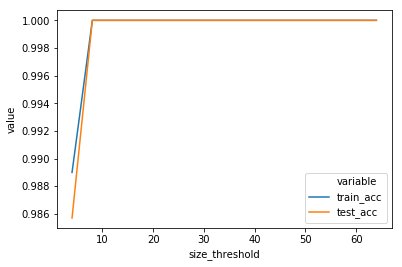

In [71]:
sns.lineplot(x='size_threshold',y='value',hue='variable',
           data=dt_accuracies.melt(id_vars=['size_threshold'],value_vars=['train_acc','test_acc']),
           ci=0)
plt.show();
#sns.lmplot(x='size_threshold',y='test_acc',data=dt_accuracies,scatter=False)